In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_ee76398726b645439c9979c937b6d61d = 'https://s3.ap.cloud-object-storage.appdomain.cloud'
else:
    endpoint_ee76398726b645439c9979c937b6d61d = 'https://s3.private.ap.cloud-object-storage.appdomain.cloud'

client_ee76398726b645439c9979c937b6d61d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Tz6Vwzja52Xxcc-3CuAQx-TTCSDeYMPWapoTzqePtcN2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_ee76398726b645439c9979c937b6d61d)

body = client_ee76398726b645439c9979c937b6d61d.get_object(Bucket='ybea-donotdelete-pr-drh8pskviy3rsp',Key='sample_submit.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)

In [2]:
# numpyのインポート
import numpy as np

# matplotlibのインポート
from matplotlib import pyplot as plt 

In [3]:
df.head()

,1,19.8
0,2,31.3
1,4,31.9
2,5,20.0
3,6,16.5
4,7,25.1


In [4]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_ee76398726b645439c9979c937b6d61d.get_object(Bucket='ybea-donotdelete-pr-drh8pskviy3rsp', Key='test.tsv')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


In [5]:
test = pd.read_csv(streaming_body_1, sep="\t")

In [6]:
test.head()

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,6,145.0,76.00,3160.0,19.6,81,2,volvo diesel
1,2,6,250.0,98.00,3525.0,19.0,77,1,ford granada
2,4,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
3,5,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw)
4,6,4,97.0,88.00,2100.0,16.5,72,3,toyota corolla 1600 (sw)


In [7]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_2 = client_ee76398726b645439c9979c937b6d61d.get_object(Bucket='ybea-donotdelete-pr-drh8pskviy3rsp', Key='train.tsv')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_2, "__iter__"): streaming_body_2.__iter__ = types.MethodType( __iter__, streaming_body_2 ) 


In [8]:
train = pd.read_csv(streaming_body_2, sep="\t")

In [9]:
train

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,395,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            199 non-null    int64  
 1   mpg           199 non-null    float64
 2   cylinders     199 non-null    int64  
 3   displacement  199 non-null    float64
 4   horsepower    199 non-null    object 
 5   weight        199 non-null    float64
 6   acceleration  199 non-null    float64
 7   model year    199 non-null    int64  
 8   origin        199 non-null    int64  
 9   car name      199 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 15.7+ KB


In [11]:
# テストの欠損値の確認
print(test.isnull())

        id  cylinders  displacement  horsepower  weight  acceleration  \
0    False      False         False       False   False         False   
1    False      False         False       False   False         False   
2    False      False         False       False   False         False   
3    False      False         False       False   False         False   
4    False      False         False       False   False         False   
..     ...        ...           ...         ...     ...           ...   
194  False      False         False       False   False         False   
195  False      False         False       False   False         False   
196  False      False         False       False   False         False   
197  False      False         False       False   False         False   
198  False      False         False       False   False         False   

     model year  origin  car name  
0         False   False     False  
1         False   False     False  
2         False

In [12]:
# isnull関数とsum関数を組み合わせて各カラムにある欠損値の数を求めてみましょう
test.isnull().sum()

id              0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
# 訓練データの欠損値の確認
print(train.isnull())

        id    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    False  False      False         False       False   False         False   
1    False  False      False         False       False   False         False   
2    False  False      False         False       False   False         False   
3    False  False      False         False       False   False         False   
4    False  False      False         False       False   False         False   
..     ...    ...        ...           ...         ...     ...           ...   
194  False  False      False         False       False   False         False   
195  False  False      False         False       False   False         False   
196  False  False      False         False       False   False         False   
197  False  False      False         False       False   False         False   
198  False  False      False         False       False   False         False   

     model year  origin  car name  
0  

In [14]:
# 投稿サンプルデータの確認
body = client_ee76398726b645439c9979c937b6d61d.get_object(Bucket='ybea-donotdelete-pr-drh8pskviy3rsp',Key='sample_submit.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

sample = pd.read_csv(body, sep="\t")
sample.head()

,"1,19.8"
0,"2,31.3"
1,"4,31.9"
2,"5,20.0"
3,"6,16.5"
4,"7,25.1"


In [15]:
# idの削除
test = test.drop(columns=["id"])
train = train.drop(columns=["id"])

In [16]:
# isnull関数とsum関数を組み合わせて各カラムにある欠損値の数を求めてみましょう
train.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [17]:
# 欠損値を含む行の削除
test = test.dropna() 

In [18]:
# 基本統計量を確認してみましょう
test.describe()

,cylinders,displacement,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,5.613065,203.540201,3057.010050,15.488442,75.854271,1.562814
std,1.745421,109.137648,866.496615,2.816943,3.592060,0.807055
min,3.000000,68.000000,1795.000000,8.000000,70.000000,1.000000
25%,4.000000,107.000000,2255.500000,13.500000,73.000000,1.000000
50%,6.000000,163.000000,2945.000000,15.500000,76.000000,1.000000
75%,8.000000,304.000000,3672.000000,17.150000,79.000000,2.000000
max,8.000000,455.000000,4952.000000,24.800000,82.000000,3.000000


In [19]:
# 欠損値を含む行の削除
train = train.dropna() 

In [20]:
# 基本統計量を確認してみましょう
train.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,24.307035,5.296482,183.311558,2883.839196,15.647739,76.165829,1.582915
std,7.797665,1.644562,98.400457,819.766870,2.701885,3.802928,0.798932
min,9.000000,3.000000,71.000000,1613.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,98.000000,2217.500000,14.000000,73.000000,1.000000
50%,24.000000,4.000000,140.000000,2702.000000,15.500000,76.000000,1.000000
75%,30.500000,6.000000,250.000000,3426.500000,17.150000,80.000000,2.000000
max,44.600000,8.000000,454.000000,5140.000000,23.700000,82.000000,3.000000


In [21]:
# displacementのみを抽出
displacement_var = train['displacement']

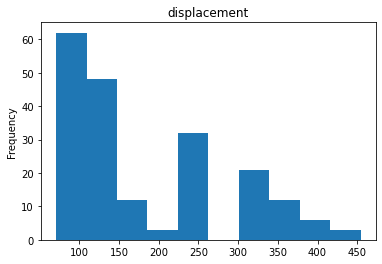

In [22]:
# ヒストグラムの可視化
displacement_var.plot.hist(title='displacement')
# 可視化結果を表示する為に必要な関数
plt.show()

In [23]:
# 他のカラムについてもヒストグラムを描画
acceleration = train['acceleration']

In [24]:
# 他のカラムについてもヒストグラムをを描画
horsepower = train['horsepower']

In [25]:
# 他のカラムについてもヒストグラムをを描画
model_year = train['model year']

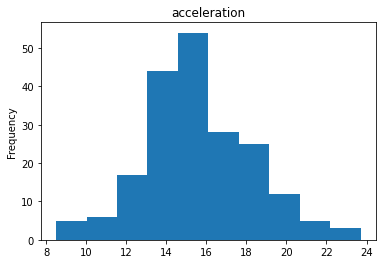

In [26]:
# 他のカラムについてもヒストグラムをを描画
acceleration.plot.hist(title='acceleration')
# 他のカラムについてもヒストグラムをを描画
plt.show()

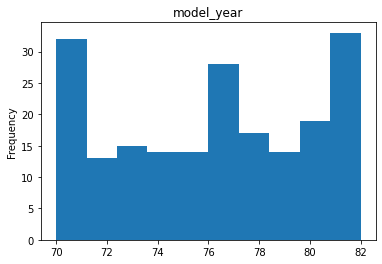

In [27]:
# 他のカラムについてもヒストグラムをを描画
model_year.plot.hist(title='model_year')
# 他のカラムについてもヒストグラムを描画
plt.show()

#相関関係分析

In [28]:
# 相関係数を求め、その結果から変数間の関係性を読み取り
train.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.770160,-0.804635,-0.820660,0.379721,0.568471,0.533671
cylinders,-0.770160,1.000000,0.950600,0.893256,-0.479561,-0.303462,-0.497373
displacement,-0.804635,0.950600,1.000000,0.933038,-0.523955,-0.329817,-0.579805
weight,-0.820660,0.893256,0.933038,1.000000,-0.401757,-0.265562,-0.535893
acceleration,0.379721,-0.479561,-0.523955,-0.401757,1.000000,0.194854,0.189193
model year,0.568471,-0.303462,-0.329817,-0.265562,0.194854,1.000000,0.124279
origin,0.533671,-0.497373,-0.579805,-0.535893,0.189193,0.124279,1.000000


In [29]:
# seabornのインポート
import seaborn as sns

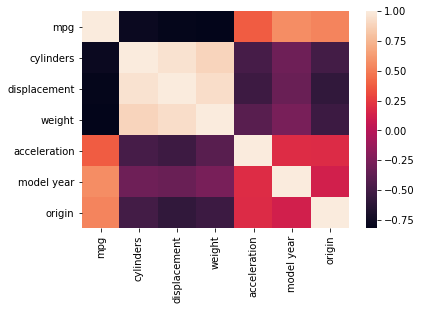

In [30]:
# 相関係数の算出
corr_matrix = train.corr()
# heatmapの可視化
sns.heatmap(corr_matrix)
# 可視化結果を表示する為に必要な関数
plt.show()

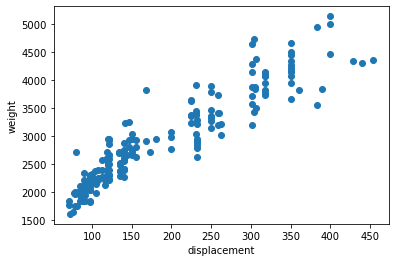

In [31]:
# 横軸にdisplacement、縦軸にweightを割り当て散布図を描画
plt.scatter(train['displacement'],train['weight'])
# x軸とy軸に名前を付与
plt.xlabel('displacement')
plt.ylabel('weight')
# 可視化結果を表示する為に必要な関数
plt.show()

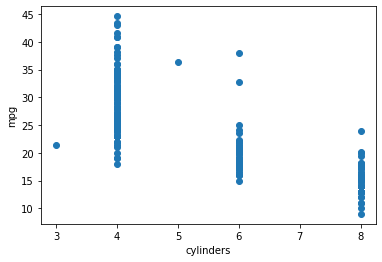

In [32]:
# 横軸にcylinders、縦軸にmpgを割り当て散布図を描画
plt.scatter(train['cylinders'],train['mpg'])
# x軸とy軸に名前を付与
plt.xlabel('cylinders')
plt.ylabel('mpg')
# 可視化結果を表示する為に必要な関数
plt.show()

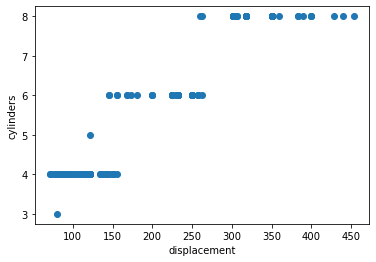

In [33]:
# 横軸にdisplacement、縦軸にcylindersを割り当て散布図を描画
plt.scatter(train['displacement'],train['cylinders'])
# x軸とy軸に名前を付与
plt.xlabel('displacement')
plt.ylabel('cylinders')
# 可視化結果を表示する為に必要な関数
plt.show()

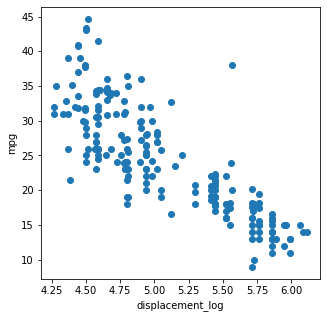

In [34]:
#対数化した結果を変数に代入
train['displacement_log'] = np.log(train['displacement'])

#グラフのサイズを指定
plt.figure(figsize=(5,5))# 横軸にdisplacement_log、縦軸にmpgを割り当て散布図を描画する
plt.scatter(train['displacement_log'],train['mpg'])
# x軸とy軸に名前を付与
plt.xlabel('displacement_log')
plt.ylabel('mpg')
# 可視化結果を表示する為に必要な関数
plt.show()

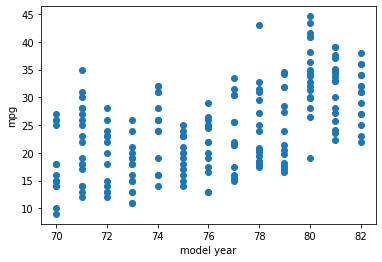

In [35]:
# 横軸にmodel year、縦軸にmpgを割り当て散布図を描画する
plt.scatter(train['model year'],train['mpg'])
# x軸とy軸に名前を付与
plt.xlabel('model year')
plt.ylabel('mpg')
# 可視化結果を表示する為に必要な関数
plt.show()

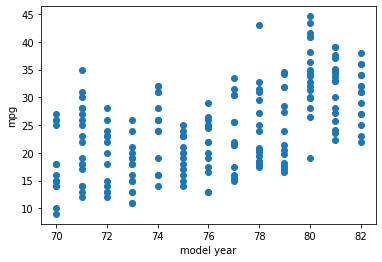

In [36]:
# 横軸にmodel year、縦軸にmpgを割り当て散布図を描画する
plt.scatter(train['model year'],train['mpg'])
# x軸とy軸に名前を付与
plt.xlabel('model year')
plt.ylabel('mpg')
# 可視化結果を表示する為に必要な関数
plt.show()

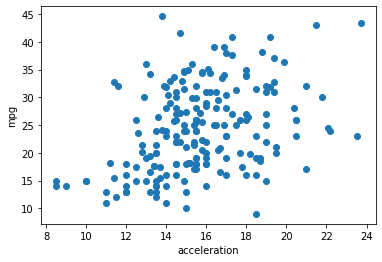

In [37]:
# 横軸にacceleration、縦軸にmpgを割り当て散布図を描画する
plt.scatter(train['acceleration'],train['mpg'])
# x軸とy軸に名前を付与
plt.xlabel('acceleration')
plt.ylabel('mpg')
# 可視化結果を表示する為に必要な関数
plt.show()

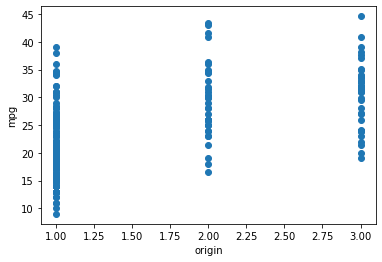

In [38]:
# 横軸にdisplacement、縦軸にmpgを割り当て散布図を描画する
plt.scatter(train['origin'],train['mpg'])
# x軸とy軸に名前を付与
plt.xlabel('origin')
plt.ylabel('mpg')
# 可視化結果を表示する為に必要な関数
plt.show()

#評価モデルの構築

In [39]:
# mpgを取り出し、変数yに代入
y = train['mpg']

In [40]:
# 6つのカラムを指定し、説明変数を表す変数Xを作成
X = train[['cylinders','displacement_log','weight','acceleration','model year','origin']]

In [41]:
# scikit-learnライブラリからtrain_test_split関数をインポート
from sklearn.model_selection import train_test_split

# 学習データと評価データに分割
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [42]:
# X_trainとX_testから行数を取り出し、それぞれ変数X_train_line, X_test_lineに代入し、表示
X_train_line = X_train.shape[0]
X_test_line = X_test.shape[0]
print(X_train_line)
print(X_test_line)

179
20


#重回帰モデル

In [43]:
# sklearnからLinearRegressionのインポート
from sklearn.linear_model import LinearRegression as LR

In [44]:
# モデルの箱を準備
lr = LR()

In [45]:
# モデルを学習
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
# モデルから予測結果を求める
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [47]:
# 予測値を表示
print(y_pred_test)

[26.68136573 31.84244016 17.29764576 27.98301163 29.1750026  21.58361185
 28.62066771 20.65642333 25.8074969  31.53538932 27.56725528 25.7185095
 20.6908242  34.92968962 26.91974828 15.63283862 37.07269072 28.71889352
 33.33861991 28.07288067]


In [48]:
# 予測値を表示
print(y_pred_train)

[16.73863116 26.02963711 24.0766771  30.13976837 29.15375627 33.15100249
 19.7306535   9.25098667 30.53487633 23.65408525 32.45878014 30.06642384
 14.69582247 27.71923676 27.13957589 25.73310951 28.70555216 35.102168
 28.33401994 19.33649574 11.33526438 21.72830101  7.25162857 30.13264547
 27.38477988 13.04800826 23.56593652  9.34304165 31.15360317 25.38844539
 24.96016916 15.04217821 30.31457023 26.10558897 20.8949024  27.25230791
 31.28786362 32.83625789 32.10920933 14.82544494 22.31406293 18.68554036
 30.32884514 28.55403091 25.26260323 23.81527515 25.27126057 21.14609597
 17.51009451 19.06957217 23.21045289 33.82077571 31.23566519 32.96061424
 31.07087965 23.02721561 18.49166538 19.45618106 31.14008563 34.73147272
 11.51875878 12.34775267 34.24489276 23.18029988 34.54314454 25.53668479
 33.89086569 33.47881837 22.20654939 20.41482526 20.8849685  27.81109488
 30.30398897 18.80971505 22.44702178 23.63356727 15.83006178 23.77936845
 21.67810647 29.63384536 28.16058199 28.28975207 30.3

In [49]:
#モデルの評価

In [50]:
# ライブラリのインポート
from sklearn.metrics import mean_squared_error as MSE

In [51]:
# 学習データのRMSEの算出
mse_train = MSE(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

In [52]:
# 評価データのRMSEの算出
mse_test = MSE(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

In [53]:
# 学習および評価データに対するRMSEを表示
print(rmse_train)
print(rmse_test)

3.2240528257821266
3.0311288084002164


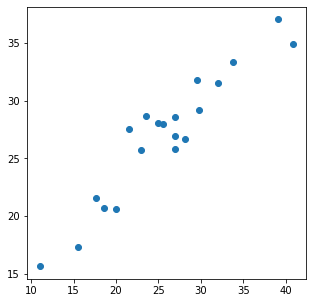

In [54]:
# グラフサイズの指定
plt.figure(figsize=(5,5))

# 散布図を描く
plt.scatter(y_test,y_pred_test)

# 可視化結果を表示する為に必要な関数
plt.show()

#提出用のファイルの作成

In [55]:
sample = y_pred_train

In [56]:
pd.DataFrame(sample).to_csv("sample_submit.csv", index=True)